In [31]:
import os                                             #library u/ path directory
import pandas as pd                                   #library u/ proses analisis data, manipulasi, persiapan, pembersihan; Salah 2 kenapa library ini digunakan adalah karena DataFrame dan Series
import numpy as np                                    #library u/ proses komputasi numerik; Array process
import cv2                                            #library u/ proses mengolah gambar; membaca, menampilkan, menyimpan gambar
import matplotlib.pyplot as plt                       #library u/ visualisasi data
from skimage.feature import local_binary_pattern      #library u/ proses mengolah LBP
from sklearn.model_selection import train_test_split  #library u/ split data
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay #library u/ klasifikasi, akurasi, konfusi matriks, visualisasi konfusi matriks
from sklearn.svm import SVC                           #svm module
from sklearn import svm                               #library u/ SVM

In [32]:
dataset_path = 'jamur-no-bg' #direktori dataset

dimensi = (128,128) #uk. resize data

#parameter LBP
radius = 1
n_points = 8*radius
method = 'uniform'

#list
fitur = []
label = []

namakelas = os.listdir(dataset_path)

for kelas in namakelas:
    dir_path = os.path.join(dataset_path, kelas)
    images_path = os.listdir(dir_path)
    
    for images in images_path:
        img_path = os.path.join(dir_path, images)
        
        #load dan preprocessing data
        img = cv2.imread(img_path) #load/read data
        resized = cv2.resize(img, dimensi, interpolation=cv2.INTER_AREA) #resize data
        grayscaled = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY) #grayscale data
        img_lbp = local_binary_pattern(grayscaled, n_points, radius, method) #proses lbp
        
        #normalisasi data dan plot histogram u/ klasifikasi
        n_bins = int(img_lbp.max()+1)
        hist,_ = np.histogram(img_lbp, density=True, bins=n_bins, range=(0, n_bins))
        
        #memasukkan item ke dalam list
        fitur.append(hist)
        label.append(kelas)
        
print('Fitur berhasil diekstraksi!')

Fitur berhasil diekstraksi!


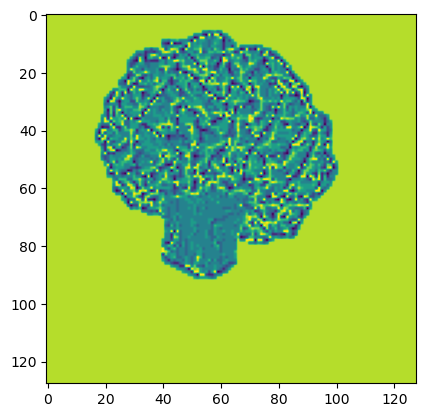

In [33]:
plt.imshow(img_lbp)

In [34]:
#konversi data ke DataFrame
df = pd.DataFrame(fitur)
df['label'] = label

#eksport DataFrame ke csv
df.to_csv('datalbp.csv', index=False)

df

,0,1,2,3,4,5,6,7,8,9,label
0,0.008118,0.012512,0.010437,0.034729,0.075012,0.040405,0.015015,0.012512,0.769409,0.021851,0
1,0.005371,0.010376,0.006653,0.021484,0.046753,0.028137,0.008423,0.006226,0.850586,0.015991,0
2,0.005981,0.008606,0.007263,0.021912,0.045593,0.028748,0.006775,0.006226,0.855713,0.013184,0
3,0.004700,0.006287,0.007080,0.024841,0.050171,0.024048,0.006042,0.004700,0.861206,0.010925,0
4,0.006104,0.010620,0.011963,0.032654,0.061829,0.029785,0.012268,0.008057,0.810791,0.015930,0
...,...,...,...,...,...,...,...,...,...,...,...
395,0.015198,0.016785,0.013184,0.020386,0.040283,0.028748,0.016602,0.014343,0.808899,0.025574,3
396,0.018555,0.020752,0.013123,0.024902,0.042664,0.033081,0.019226,0.017395,0.776794,0.033508,3
397,0.012756,0.014648,0.009521,0.013245,0.029297,0.021912,0.012268,0.010010,0.855713,0.020630,3
398,0.023254,0.030151,0.023132,0.044739,0.071106,0.038879,0.021118,0.028198,0.671936,0.047485,3


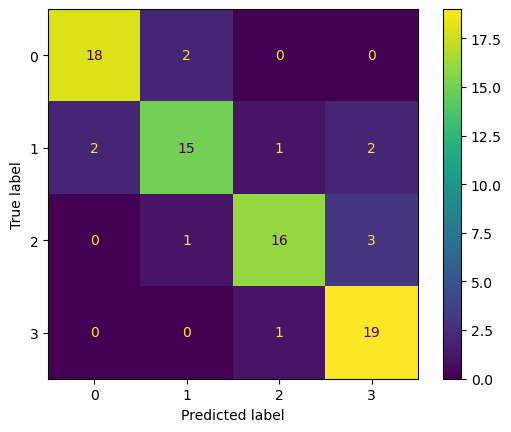

Confusion Matrix
[[18  2  0  0]
 [ 2 15  1  2]
 [ 0  1 16  3]
 [ 0  0  1 19]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        20
           1       0.83      0.75      0.79        20
           2       0.89      0.80      0.84        20
           3       0.79      0.95      0.86        20

    accuracy                           0.85        80
   macro avg       0.85      0.85      0.85        80
weighted avg       0.85      0.85      0.85        80

Akurasi: 85.00%


In [35]:
#load dataset
dataset = pd.read_csv('datalbp.csv')

X = dataset.iloc[:,:10] #mengambil nilai
Y = dataset['label']

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, train_size=0.80, random_state=106, stratify=Y) #split data
klasifikasi = svm.SVC(kernel='poly', C=140, degree=3, gamma='scale', decision_function_shape='ovr') #set parameter svm
klasifikasi.fit(Xtrain, Ytrain) #training data
prediksi = klasifikasi.predict(Xtest) #testing data

#pengujian konfusi matriks
ConfusionMatrixDisplay.from_estimator(klasifikasi, Xtest, Ytest) #visualisasi konfusi matriks
plt.show()
print('Confusion Matrix')
print(confusion_matrix(Ytest, prediksi)) #display hasil pengujian konfusi matriks

print(classification_report(Ytest, prediksi)) #display klasifikasi report
print(f'Akurasi: {accuracy_score(Ytest, prediksi)*100.0:.2f}%') #display akurasi

In [36]:
import pickle #library u/ menyimpan dan membaca data ke dalam /dari sebuah file

pickle.dump(klasifikasi, open('modellbpsvm.sav', 'wb')) #wb means 'write binary'

In [37]:
#print(Xtest)

In [38]:
#eksport DataFrame ke csv
#df=pd.DataFrame(Xtest)
#df.to_csv('datatest.csv')

#df

In [39]:
#print(Xtrain)

In [40]:
#eksport DataFrame ke csv
#df=pd.DataFrame(Xtrain)
#df.to_csv('datatrain.csv')

#df